<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/Metodoexplicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuación de calor. Metodo explicito**

*Escribir un código en Python que implemente el método explícito visto en clase para resolver el problema de la imagen adjunta.*

*Usar las notebooks de Richardson y Cranck-Nicolson como guía.
La rubrica de la notebook de Richardson se mantiene.
Los ejercicios son los siguientes:*

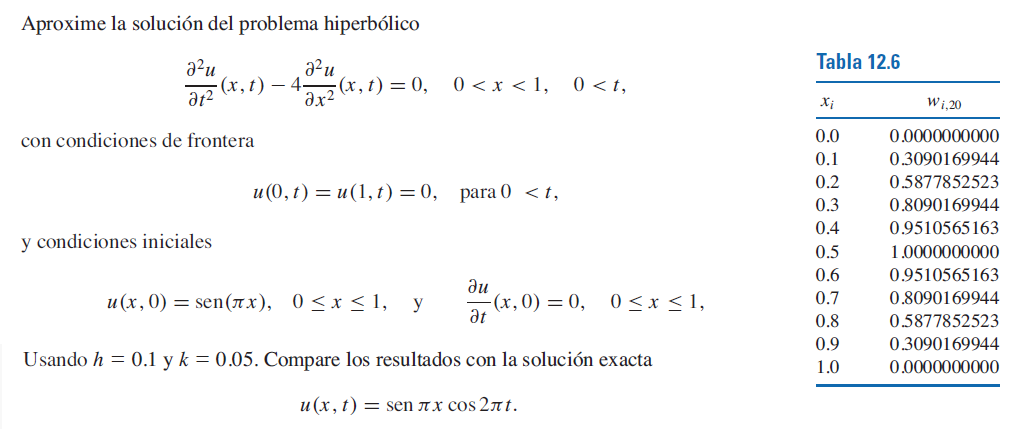



1.   Generar las gráficas 2D y 3D de la solución hasta t=0.50

2.   Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.

3.    Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.


4.    Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

%matplotlib inline

In [ ]:
#ejercicio 1 // generar las graficas 2D y 3D.
#definimos
h = 0.1
k = 0.05
c = 2
r = c * k / h
print("r =", r)

r = 1.0


In [ ]:
#empezamos a construir
x = np.arange(0, 1 + h, h)
t = np.arange(0, 1 + k, k)

Nx = len(x)
Nt = len(t)

U = np.zeros((Nt, Nx))

# Condiciones iniciales
U[0,:] = np.sin(np.pi*x)

# Condiciones de frontera
U[:,0] = 0
U[:,-1] = 0

for i in range(1, Nx-1):
    U[1,i] = U[0,i] + 0.5 * r**2 * (U[0,i+1] - 2*U[0,i] + U[0,i-1])

# Iteración con la ecuación de onda en diferencias finitas:
for n in range(1, Nt-1):
    for i in range(1, Nx-1):
        U[n+1,i] = (2*(1-r**2)*U[n,i]
                    - U[n-1,i]
                    + r**2*(U[n,i+1] + U[n,i-1]))


*Impresion de grafica en 2D para t=0, 0.1, 0.2, 0.3, 0.4, 0.5.*

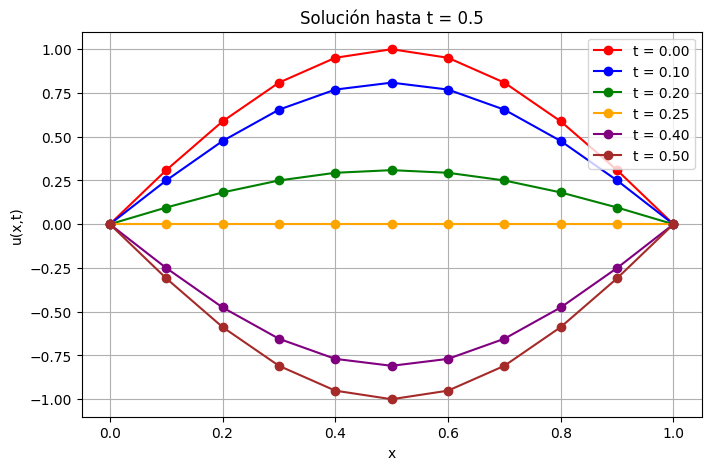

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

tiempos = [0, int(0.1/k), int(0.2/k), int(0.3/k), int(0.4/k), int(0.5/k)]

colores = ["red", "blue", "green", "orange", "purple", "brown"]

for idx, color in zip(tiempos, colores):
    ax.plot(x, U[idx, :], '-o', label=f"t = {t[idx]:.2f}", color=color)

ax.set_title("Solución hasta t = 0.5")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.grid(True)
ax.legend()
plt.show()


*Impresion de grafica en 3D para la misma solucion de t*

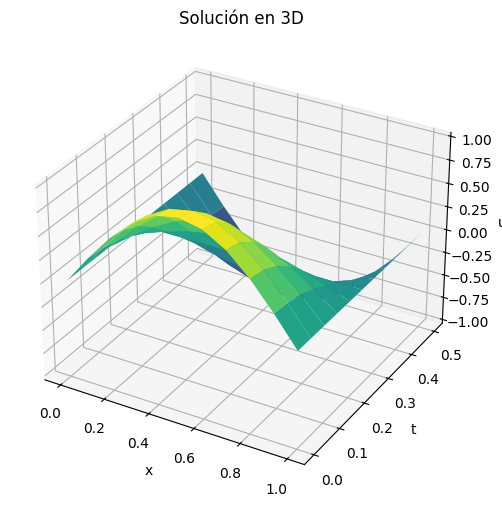

In [ ]:
limit = int(0.5/k)

X, T = np.meshgrid(x, t[:limit+1])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U[:limit+1,:], cmap='viridis')

ax.set_title("Solución en 3D")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()

In [ ]:
#ejercicio 2. Comparar los valores correspondientes.
tabla_x = np.arange(0, 1+h, h)

tabla_vals = np.array([
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163, 1.0000000000,
    0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944,0.0000000000
])

# La solución numérica en t=1 (n=20 si k=0.05)
n20 = int(1/k)
u_num = U[n20,:]

In [ ]:
#Tabla comparativa
print("Comparación de la solución numérica obtenida y los datos de la tabla 12.6:")
print("  x   |  Tabla 12.6  |   Numérico   | Diferencia \n")
for i in range(len(tabla_x)):
    diff = u_num[i] - tabla_vals[i]
    print(f"{tabla_x[i]:.1f}   | {tabla_vals[i]:.10f} | {u_num[i]:.10f} | {diff:.3e}")

#ejercicio 3.
#calculo de errores
error_max = np.max(np.abs(u_num - tabla_vals))
error_L2 = np.sqrt(np.sum((u_num - tabla_vals)**2))

print("\nError máximo =", error_max)
print("Error L2 =", error_L2)

Comparación de la solución numérica obtenida y los datos de la tabla 12.6:
  x   |  Tabla 12.6  |   Numérico   | Diferencia 

0.0   | 0.0000000000 | 0.0000000000 | 0.000e+00
0.1   | 0.3090169944 | 0.3090169944 | -2.505e-11
0.2   | 0.5877852523 | 0.5877852523 | -7.527e-12
0.3   | 0.8090169944 | 0.8090169944 | -2.505e-11
0.4   | 0.9510565163 | 0.9510565163 | -4.846e-12
0.5   | 1.0000000000 | 1.0000000000 | 0.000e+00
0.6   | 0.9510565163 | 0.9510565163 | -4.847e-12
0.7   | 0.8090169944 | 0.8090169944 | -2.505e-11
0.8   | 0.5877852523 | 0.5877852523 | -7.527e-12
0.9   | 0.3090169944 | 0.3090169944 | -2.505e-11
1.0   | 0.0000000000 | 0.0000000000 | 0.000e+00

Error máximo = 2.5052571128725276e-11
Error L2 = 5.167982740989897e-11


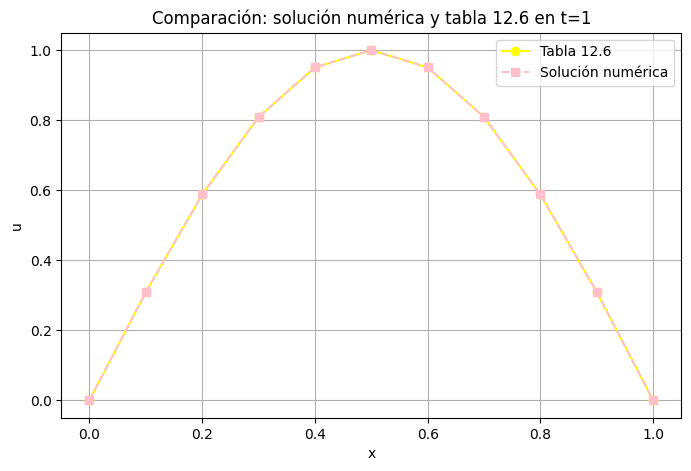

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(tabla_x, tabla_vals, "o-", color="yellow", label="Tabla 12.6")
plt.plot(x, u_num, "s--", color="pink", label="Solución numérica")

plt.title("Comparación: solución numérica y tabla 12.6 en t=1")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.legend()
plt.show()


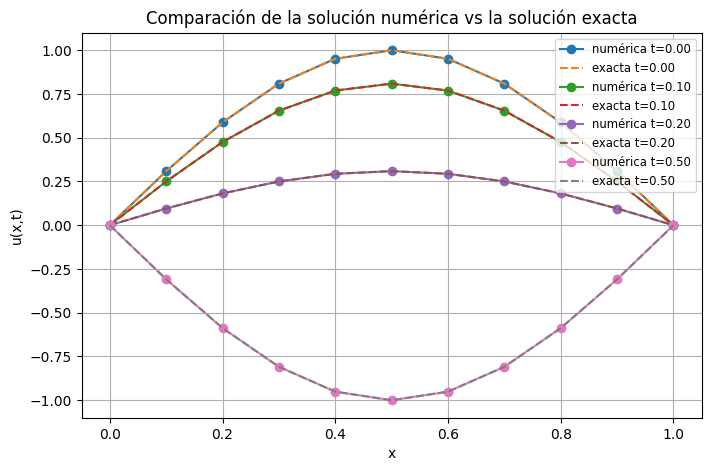

In [ ]:
def comparacion_exacto(x_val, t_val):
    return np.sin(np.pi * x_val) * np.cos(2 * np.pi * t_val)

comparacion_t = [0.0, 0.1, 0.2, 0.5]
comparacion_indices = [int(round(tt / k)) for tt in comparacion_t]

plt.figure(figsize=(8,5))
for idx in comparacion_indices:
    plt.plot(x, U[idx, :], '-o', label=f"numérica t={t[idx]:.2f}")
    plt.plot(x, comparacion_exacto(x, t[idx]), linestyle='--', label=f"exacta t={t[idx]:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Comparación de la solución numérica vs la solución exacta")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

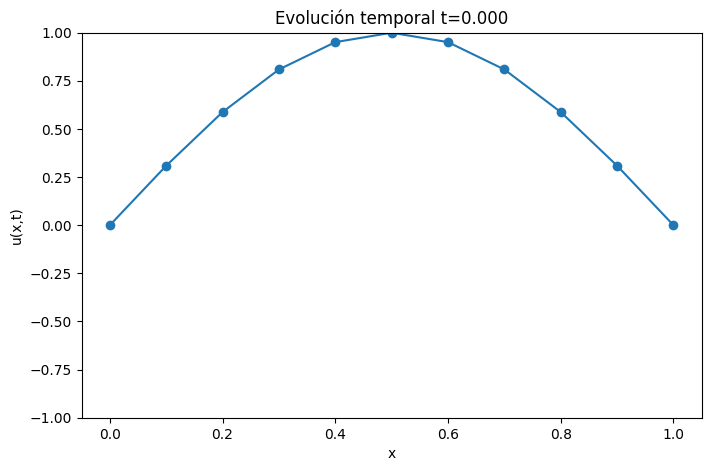

In [ ]:
#ejercicio 4 // Genere una animación de la evolución temporal de la solución.
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0,:], '-o')
ax.set_ylim(-1, 1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la onda")

def animate(n):
    line.set_ydata(U[n,:])
    ax.set_title(f"Evolución temporal t={t[n]:.3f}")
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=40)

HTML(ani.to_jshtml())